# Syntethic Profiles Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Syntethic profile

In [10]:
i_zero = 1.0
gam = 0.8
c = 0.3
R_cutL = 0.3
R_cutR = 2.9


r_g = 1
sigma = 0.1
f = 0.9

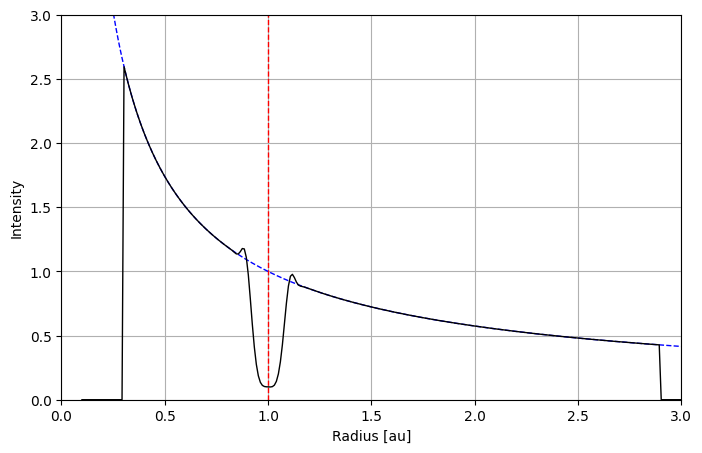

In [11]:
r = np.linspace(0.1, 3, 300)

# derived parameters
r_sinc = c * (np.pi * ((r - r_g) / sigma))**2

# Calculate the radial intensity profile
powerlaw = i_zero * ((r / r_g)**(-gam))

# Calculate the gap factor
sinc = np.sin(r_sinc) / r_sinc
gauss = np.exp((-(r - r_g)**4) / (2 * sigma**4))

# Cut factors
L_cut_factor = (r >= R_cutL).astype(float)
R_cut_factor = (r <= R_cutR).astype(float)

# Time to tighten all together
gap_factor = (1 - f * (sinc * gauss))

# Combine the power law with the gap and bump factors
syn_profile = powerlaw * gap_factor * L_cut_factor * R_cut_factor


# Plot
plt.figure(figsize=(8, 5))

plt.axvline(r_g,
            color='red',
            linestyle='--',
            linewidth=1)

plt.plot(
    r,
    powerlaw,
    color="blue",
    linewidth=1,
    linestyle="--"
)

plt.plot(
    r,
    syn_profile,
    color="black",
    linewidth=1,
)

plt.xlim(0, 3)
plt.ylim(0, 3)
plt.grid(True)
plt.xlabel("Radius [au]")
plt.ylabel("Intensity")
plt.show()